<a href="https://colab.research.google.com/github/Mahiyan-Khan-Abir/Death-due-to-various-disease/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Diabates/diabetes.csv")
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [7]:
df1 = pd.DataFrame(df)
df1.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [4]:
#Correlation
import matplotlib.pyplot as plt
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
x= df.iloc[:, [0,1,4,5,6,7]].values  
y= df.iloc[:, 8].values  
print(x)

[[  6.    148.      0.     33.6     0.627  50.   ]
 [  1.     85.      0.     26.6     0.351  31.   ]
 [  8.    183.      0.     23.3     0.672  32.   ]
 ...
 [  5.    121.    112.     26.2     0.245  30.   ]
 [  1.    126.      0.     30.1     0.349  47.   ]
 [  1.     93.      0.     30.4     0.315  23.   ]]


**Spliting the dataset**

In [9]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [10]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

**K-Neighbors Classifier**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
classifierKN = KNeighborsClassifier(n_neighbors = 8)
classifierKN.fit(x_train, y_train)

y_predKN = classifierKN.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_KN = confusion_matrix(y_test, y_predKN)
result_KN = classification_report(y_test, y_predKN)
print("Classification Report:",)
print (result_KN)
resultKN2 = accuracy_score(y_test,y_predKN)
print("Accuracy:",resultKN2*100,'%')

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       130
           1       0.73      0.53      0.62        62

    accuracy                           0.79       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.78      0.79      0.78       192

Accuracy: 78.64583333333334 %


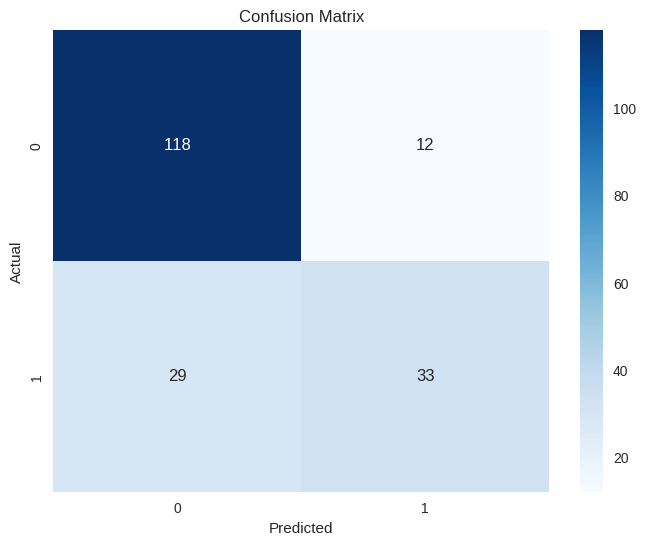

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(CM_KN, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Naïve Bayes**

In [42]:
# Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifierNB = GaussianNB()  
classifierNB.fit(x_train, y_train)  

# Predicting the Test set results  
y_predNB = classifierNB.predict(x_test)  
 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_NB = confusion_matrix(y_test, y_predNB)
result_NB = classification_report(y_test, y_predNB)
print("Classification Report:",)
print (result_NB)
result_NB2 = accuracy_score(y_test,y_predNB)
print("Accuracy:",result_NB2*100,'%')

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       130
           1       0.70      0.53      0.61        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192

Accuracy: 77.60416666666666 %


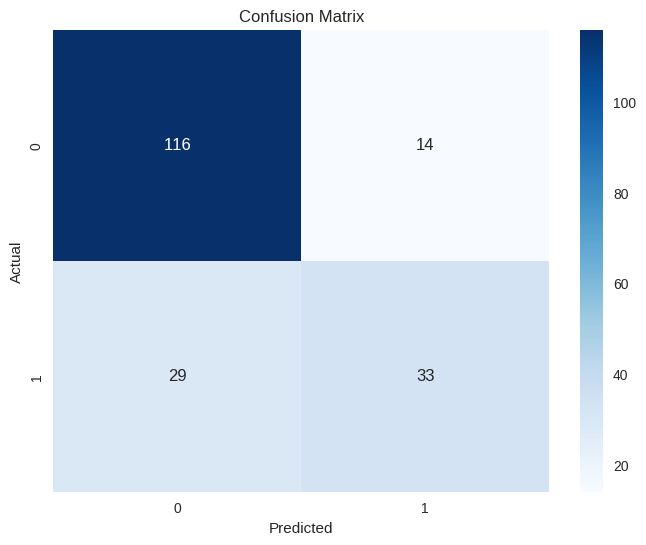

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(CM_NB, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**SVM**

In [44]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score
 

skf = StratifiedKFold(n_splits=10)
clf = svm.SVC(kernel='linear', C=1)

X= df.iloc[:, [5]].values  
Y= df.iloc[:, 6].values 
    
# "Support vector classifier"     
from sklearn.svm import SVC
classifierSVC = SVC(kernel='linear', random_state=0)  
classifierSVC.fit(x_train, y_train)

#Predicting the test set result  
y_predSVC = classifierSVC.predict(x_test)  

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
CM_SVM = confusion_matrix(y_test, y_predSVC)

result_SVM = classification_report(y_test, y_predSVC)
print("Classification Report:",)
print (result_SVM)
result_SVM2 = accuracy_score(y_test,y_predSVC)
print("Accuracy:",result_SVM2*100,'%')


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       130
           1       0.74      0.56      0.64        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.75       192
weighted avg       0.79      0.80      0.79       192

Accuracy: 79.6875 %


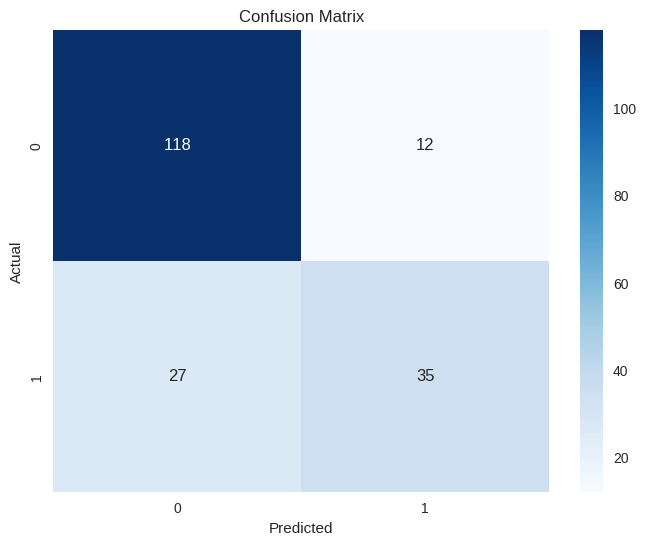

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(CM_SVM, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


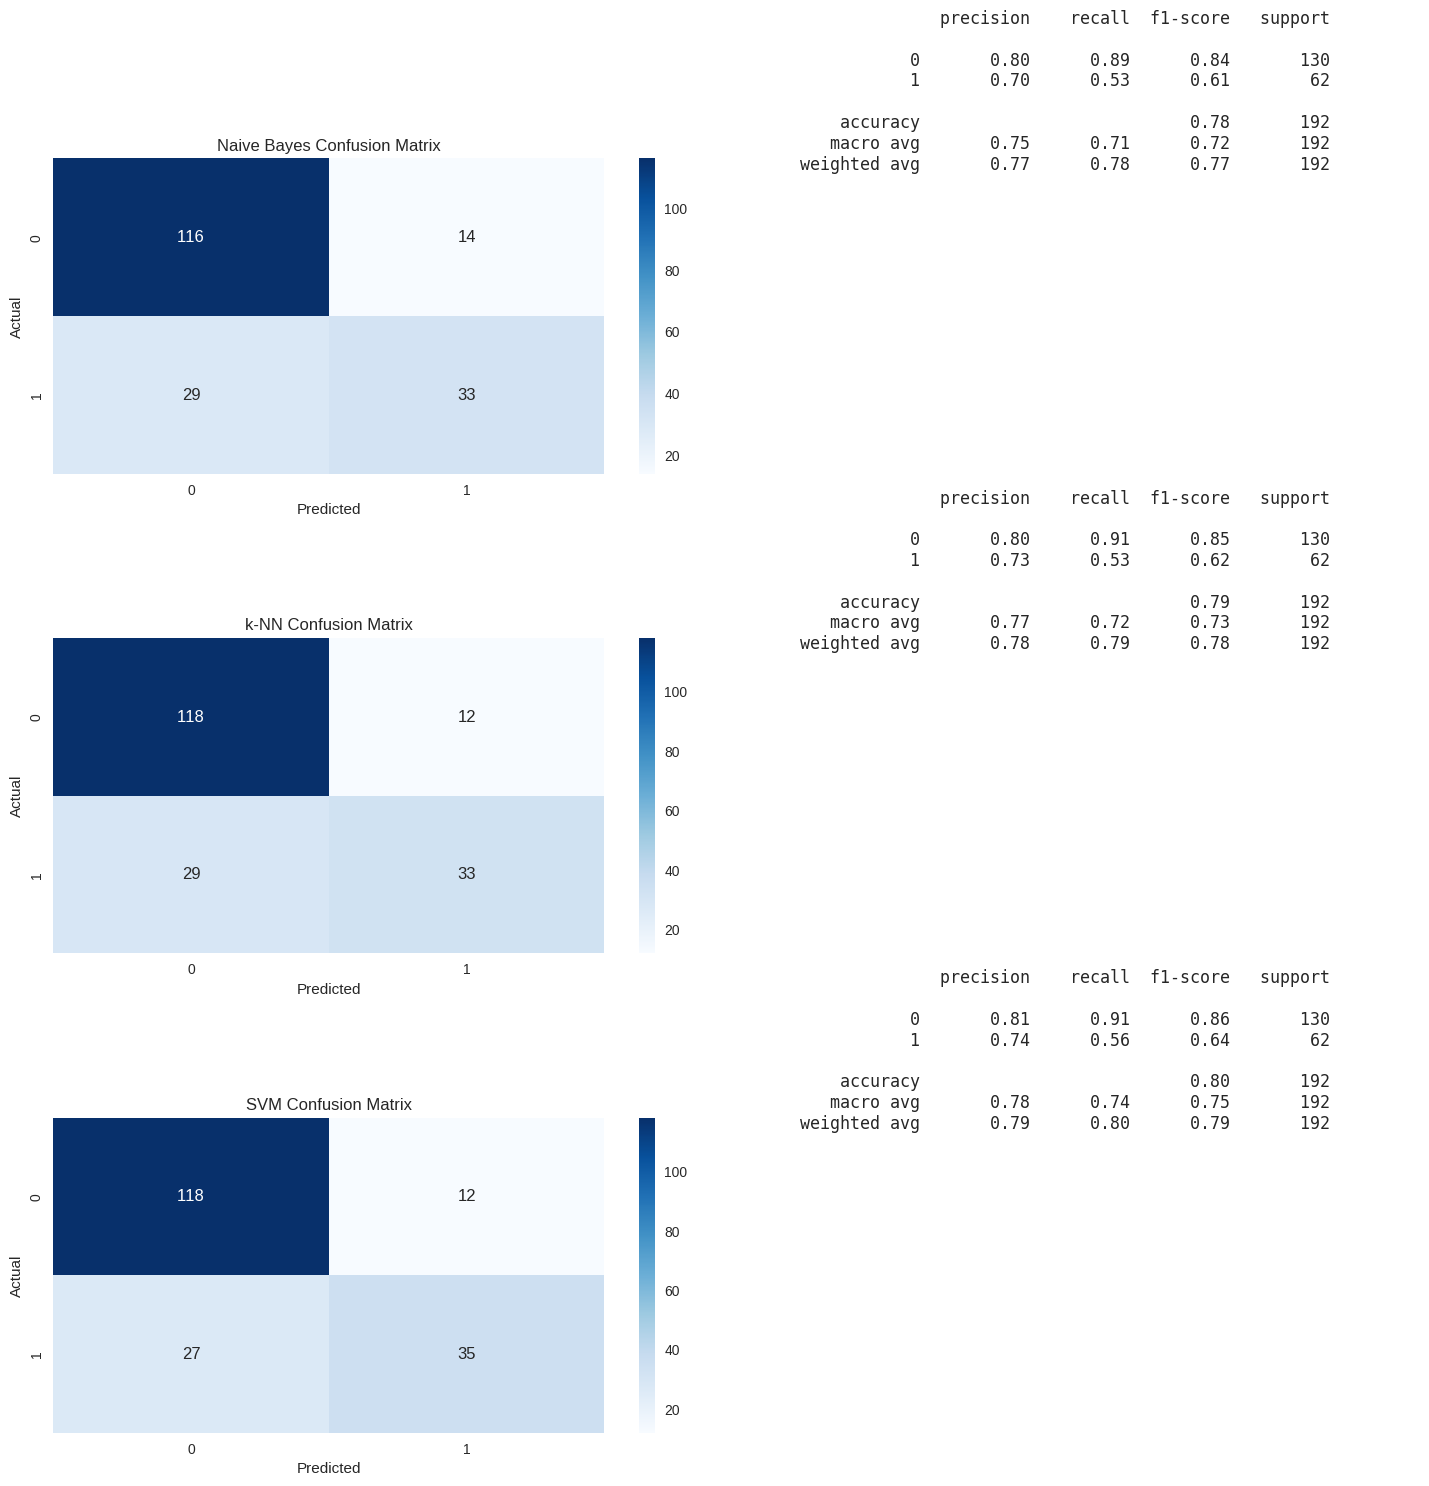

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot confusion matrix and classification report for each classifier in one figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15,15))

sns.heatmap(CM_NB, annot=True, fmt='d', cmap='Blues', ax=axs[0,0])
axs[0,0].set_title('Naive Bayes Confusion Matrix')
axs[0,0].set_xlabel('Predicted')
axs[0,0].set_ylabel('Actual')

#axs[0,1].set_title('Naive Bayes Classification Report')
axs[0,1].text(0.1, 0.9, result_NB, {'fontsize': 12}, fontproperties = 'monospace')
axs[0,1].axis('off')

sns.heatmap(CM_KN, annot=True, fmt='d', cmap='Blues', ax=axs[1,0])
axs[1,0].set_title('k-NN Confusion Matrix')
axs[1,0].set_xlabel('Predicted')
axs[1,0].set_ylabel('Actual')

axs[1,1].text(0.1, 0.9, result_KN, {'fontsize': 12}, fontproperties = 'monospace')
axs[1,1].axis('off')

sns.heatmap(CM_SVM, annot=True, fmt='d', cmap='Blues', ax=axs[2,0])
axs[2,0].set_title('SVM Confusion Matrix')
axs[2,0].set_xlabel('Predicted')
axs[2,0].set_ylabel('Actual')

axs[2,1].text(0.1, 0.9, result_SVM, {'fontsize': 12}, fontproperties = 'monospace')
axs[2,1].axis('off')

plt.tight_layout()
plt.show()
